In [1]:
from google.colab import files
uploaded = files.upload()

Saving karachi_daily_data_5_years.csv to karachi_daily_data_5_years.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.stats import ttest_ind

In [10]:
df = pd.read_csv('karachi_daily_data_5_years.csv')

# Convert timestamp to datetime objects and set it as the index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Checking the first few rows
print("Data Head:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())

import pandas as pd

df = pd.read_csv('karachi_daily_data_5_years.csv')

descriptive_stats = df.describe()


Data Head:
                                 pm10       pm25  carbon_monoxide  \
timestamp                                                           
2022-08-05 00:00:00+05:00   58.337500  28.212500       507.416667   
2022-08-06 00:00:00+05:00   51.716667  27.466667       431.958333   
2022-08-07 00:00:00+05:00   89.125000  57.629167       944.125000   
2022-08-08 00:00:00+05:00  103.129167  64.520833      1150.500000   
2022-08-09 00:00:00+05:00   77.562500  54.037500       849.000000   

                           nitrogen_dioxide  temperature   humidity  \
timestamp                                                             
2022-08-05 00:00:00+05:00         22.725000    28.612500  85.500000   
2022-08-06 00:00:00+05:00         22.137500    28.216667  86.416667   
2022-08-07 00:00:00+05:00         39.291667    28.479167  88.958333   
2022-08-08 00:00:00+05:00         46.795833    28.908333  87.125000   
2022-08-09 00:00:00+05:00         50.870833    29.562500  86.208333   

       

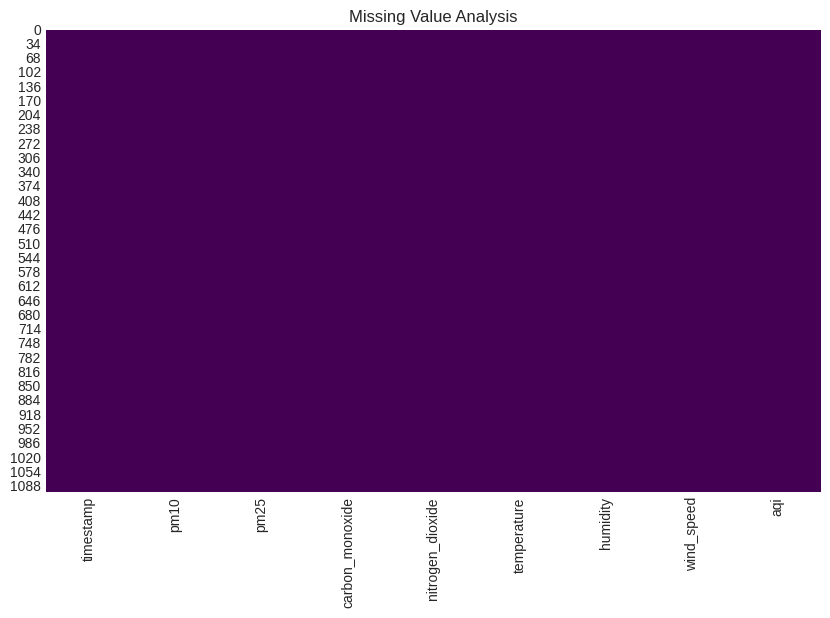


Total Missing Values Per Column:
timestamp           0
pm10                0
pm25                0
carbon_monoxide     0
nitrogen_dioxide    0
temperature         0
humidity            0
wind_speed          0
aqi                 0
dtype: int64


In [11]:
# --- Missing Value Analysis ---
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Analysis')
plt.show()

print(f"\nTotal Missing Values Per Column:\n{df.isnull().sum()}")



No missing values hence no need for imputation :)


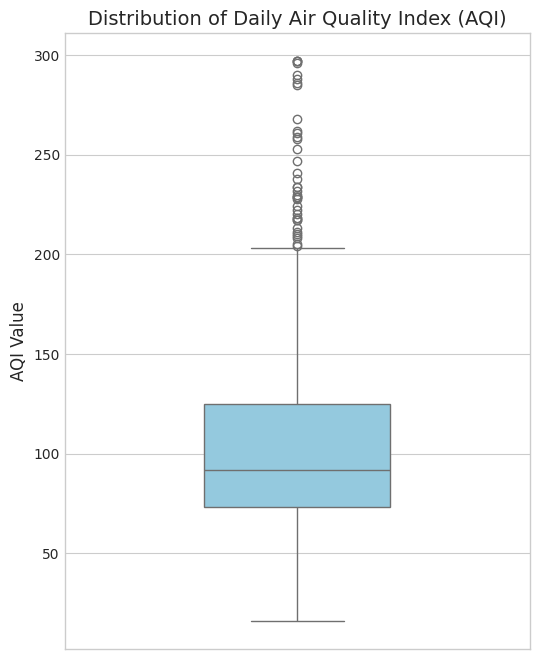

In [12]:
# Univariate Analysis begins here

sns.set_style("whitegrid")

# Create a figure and axes for the plot
plt.figure(figsize=(6, 8)) # A taller figure works well for a single box plot

# Create the box plot specifically for the 'aqi' column
sns.boxplot(y=df['aqi'], color="skyblue", width=0.4)

# Add a descriptive title and labels for clarity
plt.title('Distribution of Daily Air Quality Index (AQI)', fontsize=14)
plt.ylabel('AQI Value', fontsize=12)

# Display the final plot
plt.show()


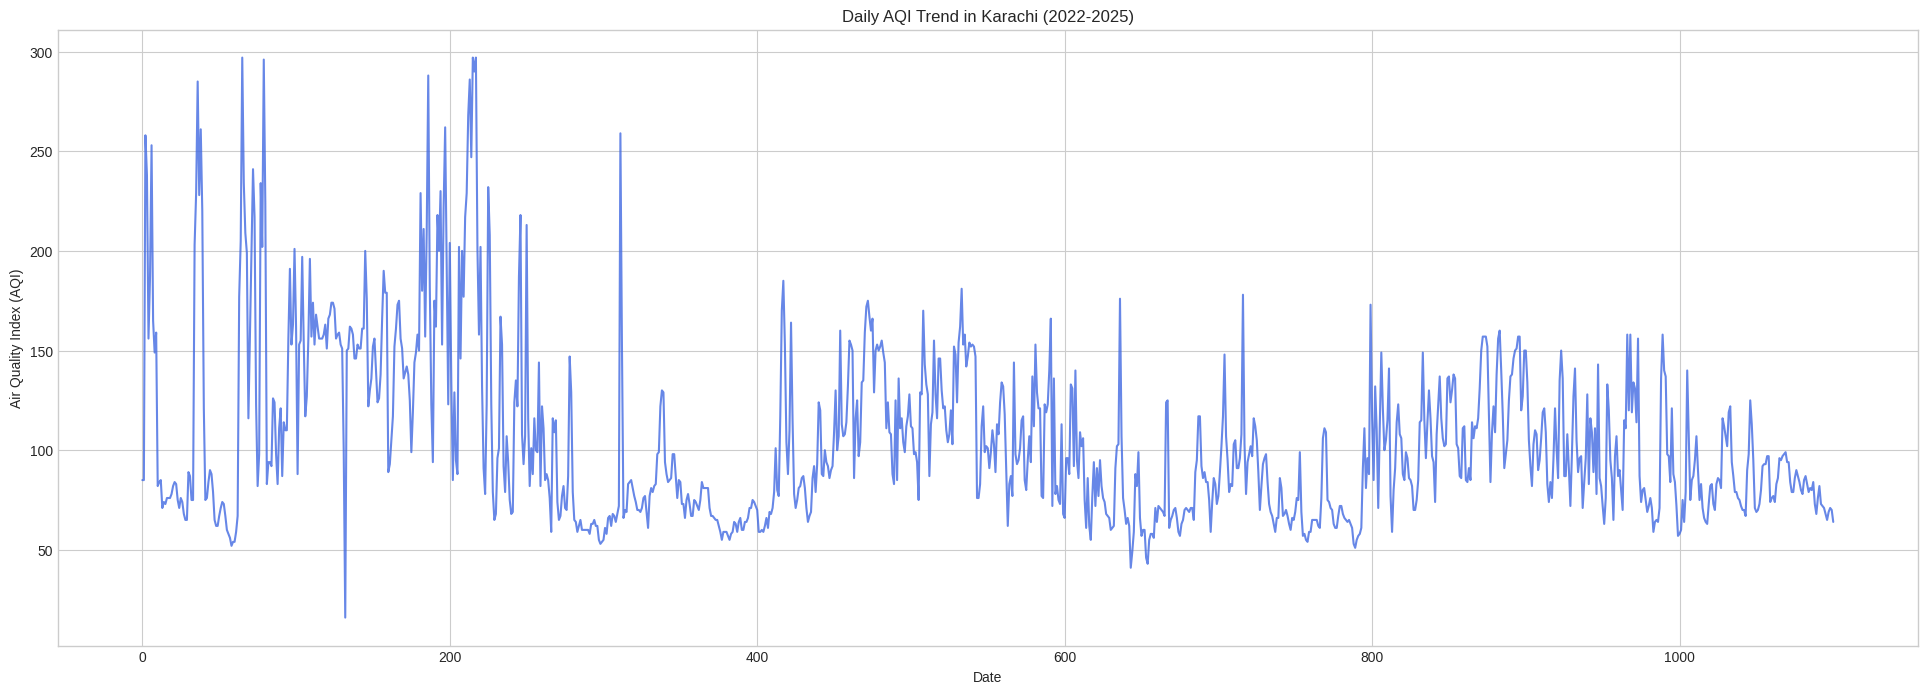

In [13]:
# --- Time Series Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(24,8))
df['aqi'].plot(title='Daily AQI Trend in Karachi (2022-2025)', color='royalblue', alpha=0.8)
plt.ylabel('Air Quality Index (AQI)')
plt.xlabel('Date')
plt.show()

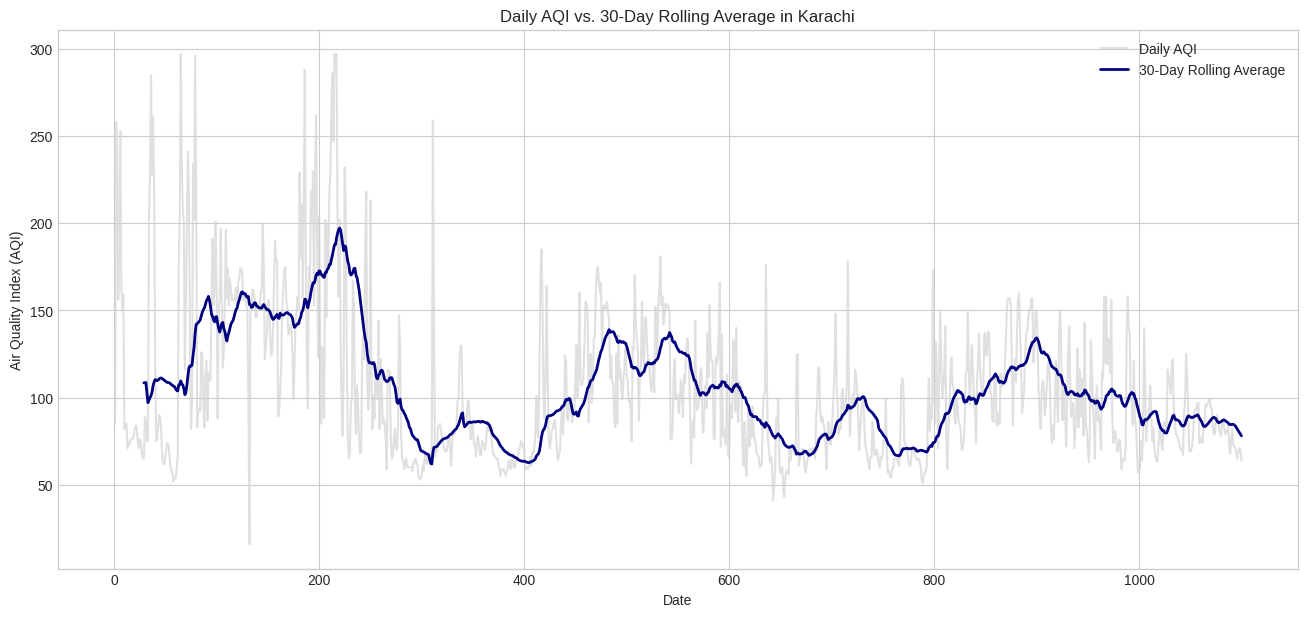

In [14]:
# --- Trend Analysis with Rolling Average ---
# Calculate 30-day and 90-day rolling averages
df['aqi_30d_rolling'] = df['aqi'].rolling(window=30).mean()

# Plot the original data and the rolling average
plt.figure(figsize=(16, 7))
plt.plot(df.index, df['aqi'], label='Daily AQI', color='lightgray', alpha=0.7)
plt.plot(df.index, df['aqi_30d_rolling'], label='30-Day Rolling Average', color='navy', linewidth=2)
plt.title('Daily AQI vs. 30-Day Rolling Average in Karachi')
plt.xlabel('Date')
plt.ylabel('Air Quality Index (AQI)')
plt.legend()
plt.show()

/tmp/ipython-input-3695908645.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='aqi', data=df, palette='winter')


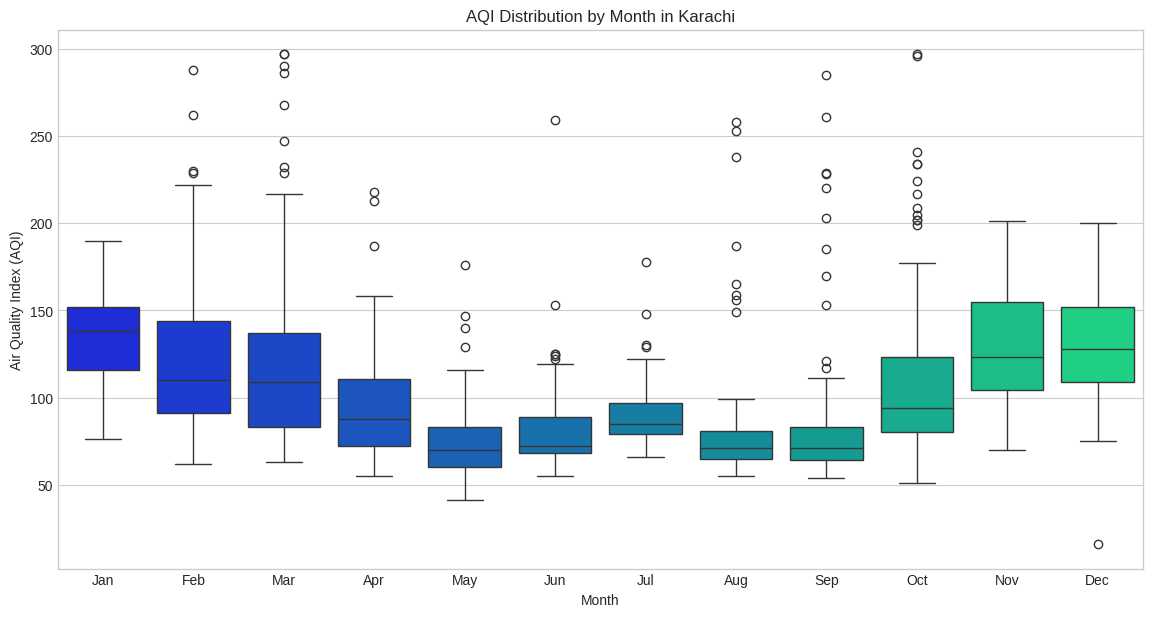

In [16]:
# 1. Load the data from the CSV file
df = pd.read_csv('karachi_daily_data_5_years.csv')

# 2. Convert the 'timestamp' column to a datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 3. Set the 'timestamp' column as the DataFrame's index
df.set_index('timestamp', inplace=True)

# --- Your original code (which will now work) ---
df['month'] = df.index.month

plt.figure(figsize=(14, 7))
sns.boxplot(x='month', y='aqi', data=df, palette='winter')
plt.title('AQI Distribution by Month in Karachi')
plt.xlabel('Month')
plt.ylabel('Air Quality Index (AQI)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [17]:
# --- Perform the T-test ---

# NOTE THIS IS DONE TO GET CONCRETE PROOF THAT AVERAGE AQI IS DIFFERENT IN SUMMER AND WINTER
# THIS IS NOT PART OF BI VARIATE ANALYSIS

# 1. Define the months for each season
# For Karachi, winter is roughly Nov, Dec, Jan, Feb
winter_months = [11, 12, 1, 2]
# Summer/Monsoon is roughly Jun, Jul, Aug, Sep
summer_months = [6, 7, 8, 9]

# 2. Create two separate samples based on the seasons
aqi_winter = df[df.index.month.isin(winter_months)]['aqi']
aqi_summer = df[df.index.month.isin(summer_months)]['aqi']

# 3. Perform the independent samples t-test
# We set equal_var=False as the box plot showed different variances
t_statistic, p_value = ttest_ind(aqi_winter, aqi_summer, equal_var=False)


# 4. Print and interpret the results
print("--- Statistical Test: Winter vs. Summer AQI ---")
print(f"Mean Winter AQI: {aqi_winter.mean():.2f}")
print(f"Mean Summer AQI: {aqi_summer.mean():.2f}")
print("-" * 50)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print("-" * 50)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: The p-value is less than 0.05.")
    print("We REJECT the null hypothesis.")
    print("There is a statistically significant difference in AQI between winter and summer months.")
else:
    print("Conclusion: The p-value is greater than 0.05.")
    print("We FAIL to reject the null hypothesis.")
    print("There is no statistically significant difference in AQI between winter and summer months.")

--- Statistical Test: Winter vs. Summer AQI ---
Mean Winter AQI: 128.86
Mean Summer AQI: 84.91
--------------------------------------------------
T-statistic: 17.3059
P-value: 0.0000
--------------------------------------------------
Conclusion: The p-value is less than 0.05.
We REJECT the null hypothesis.
There is a statistically significant difference in AQI between winter and summer months.


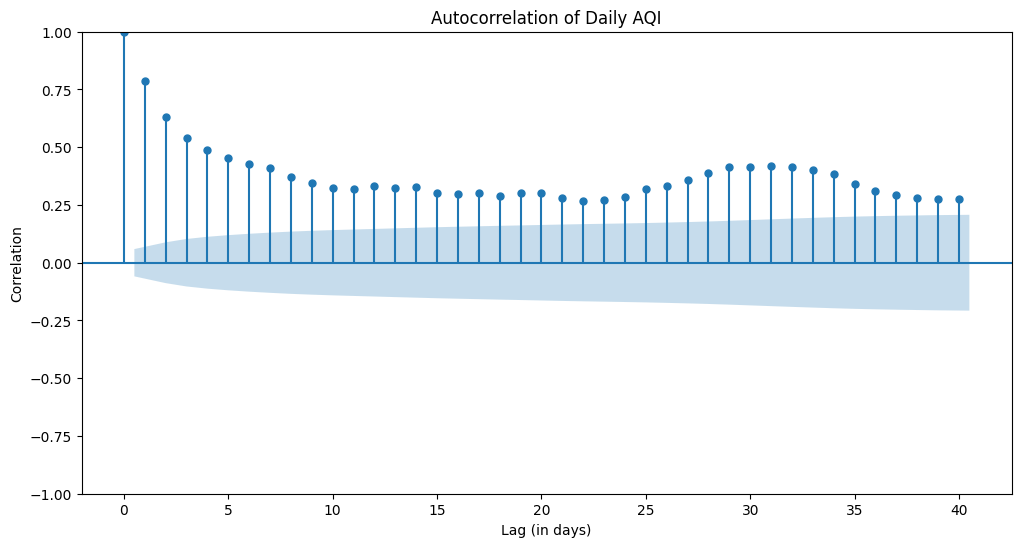

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

# --- Autocorrelation Plot ---
# We'll check the correlation of AQI with its values from the past 40 days

# PURPOSE OF AUTOCORRELATION IS TO SEE WHETHER THE PREVIOUS DAYS AQI HAS ANY CORRELATION ON TODAYS AQI
# INFERING FROM THE CHART WE CAN SEE THAT YES TODAYS AQI DOES CORRELATED POSITIVELY WITH LAGGING AQI

plt.style.use('default')
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df['aqi'].dropna(), lags=40, ax=ax)
ax.set_title('Autocorrelation of Daily AQI')
ax.set_xlabel('Lag (in days)')
ax.set_ylabel('Correlation')
plt.show()

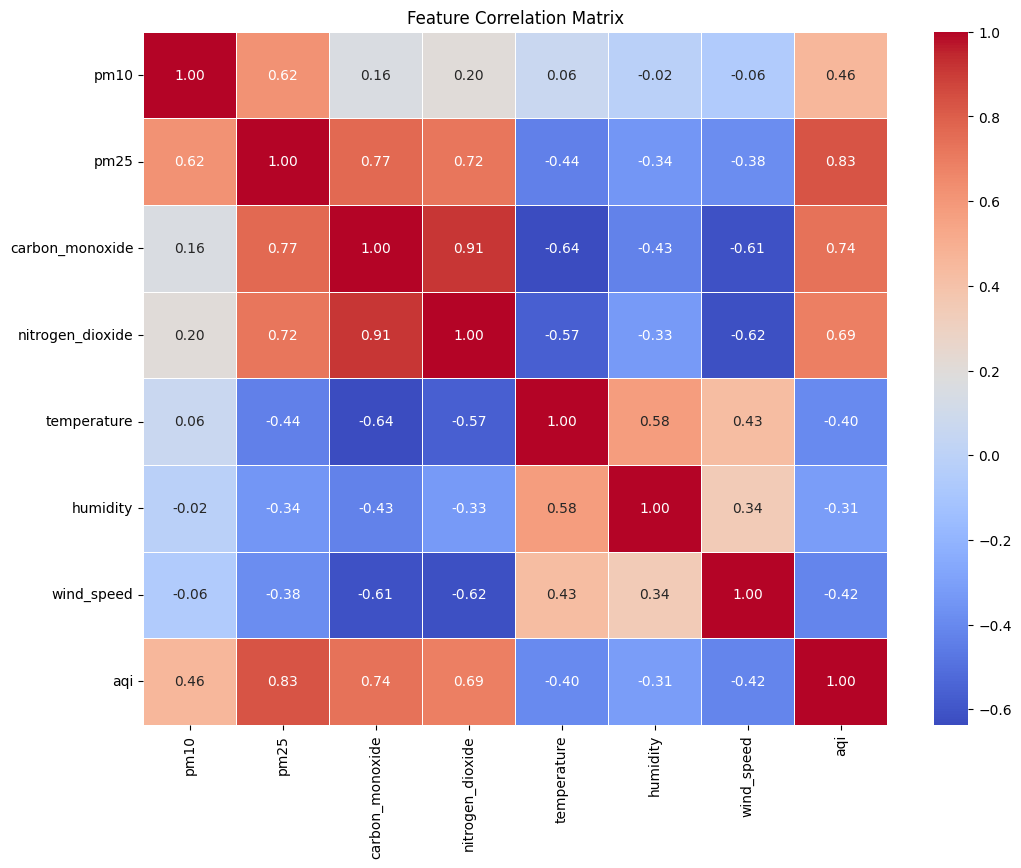

In [19]:
# --- Correlation Heatmap ---
# We'll drop the 'month' column as it's categorical for this calculation
corr_matrix = df.drop(columns=['month']).corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

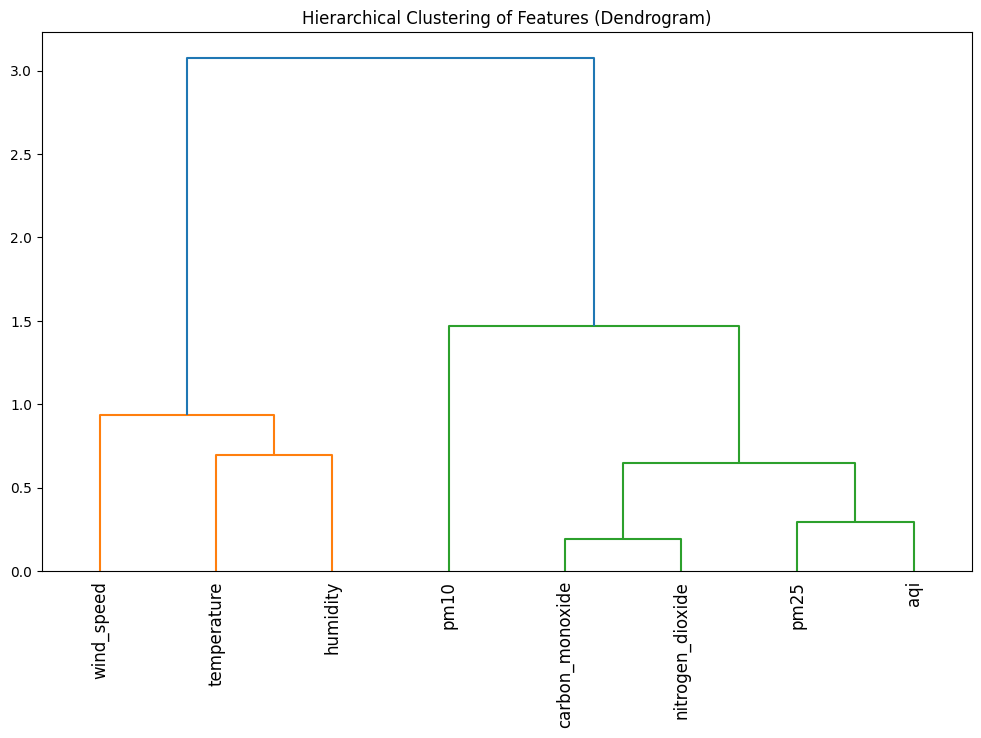

In [20]:
# --- Dendrogram ---
plt.figure(figsize=(12, 7))
# Use correlation distance for clustering
Z = hierarchy.linkage(corr_matrix, 'average')
hierarchy.dendrogram(Z, labels=corr_matrix.columns, orientation='top', leaf_rotation=90)
plt.title('Hierarchical Clustering of Features (Dendrogram)')
plt.show()

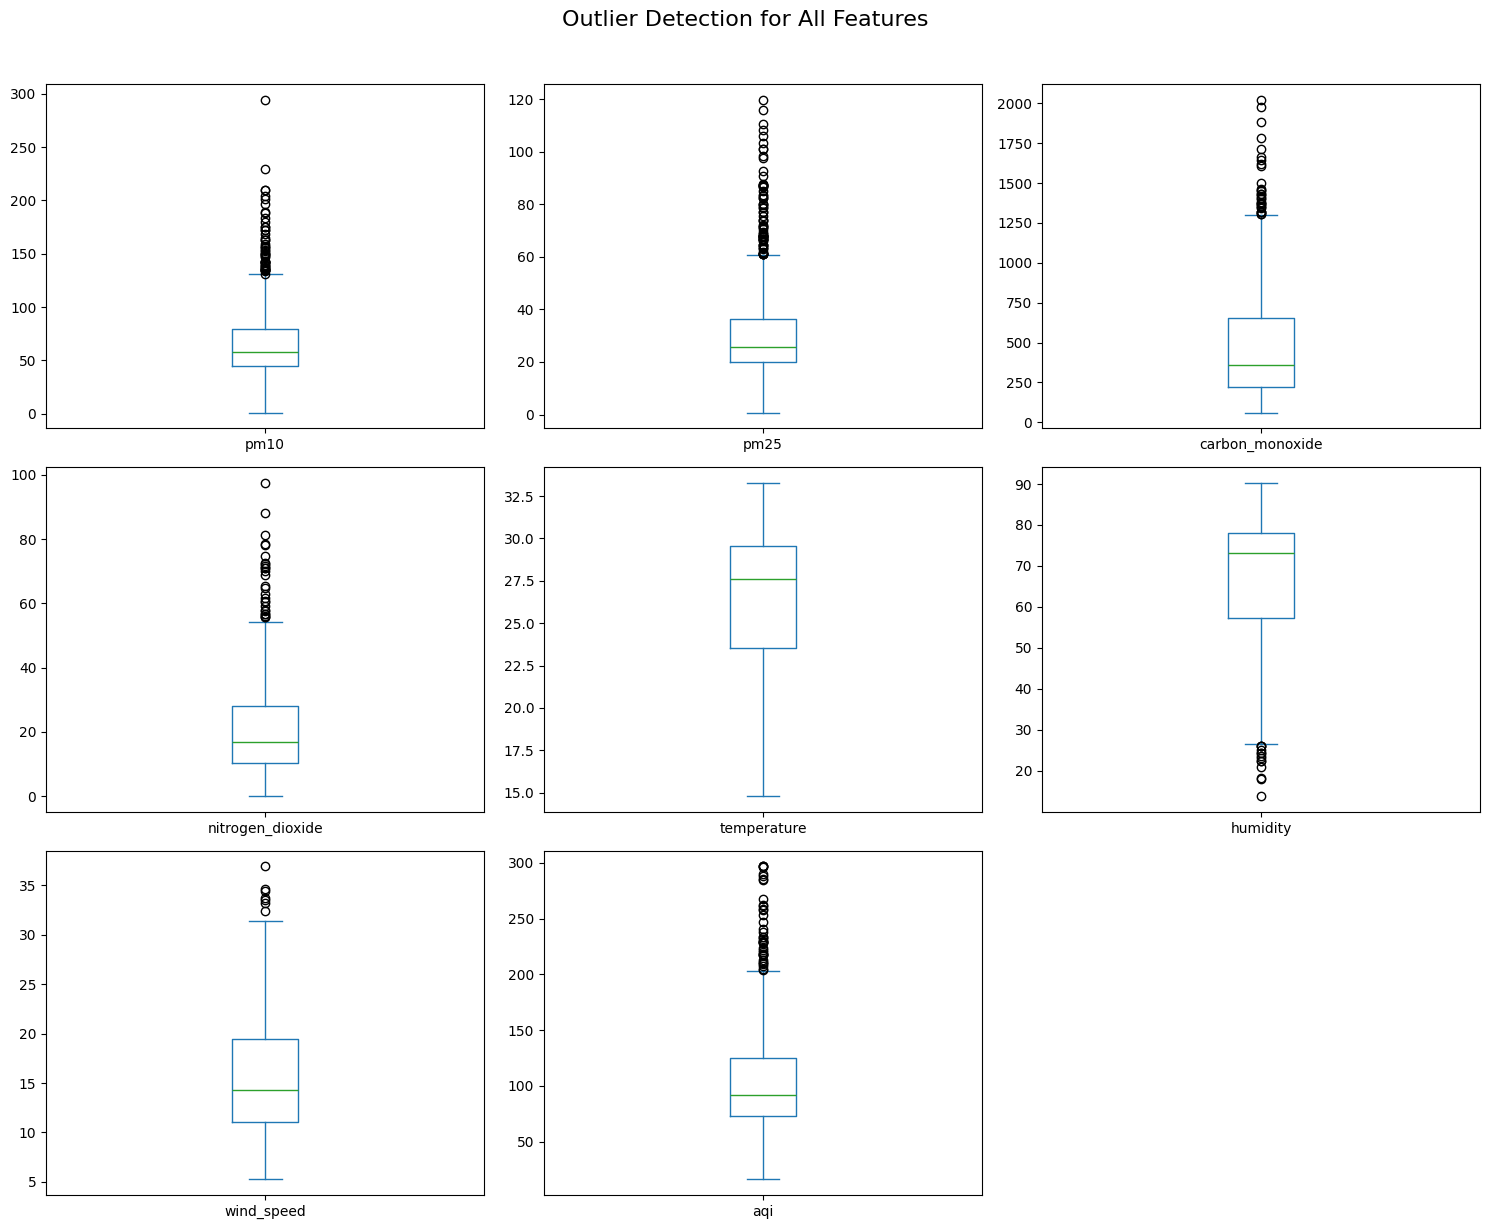

In [21]:
# Outlier Analysis begins here
features_to_plot = df.drop(columns=['month'])
features_to_plot.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 12), sharex=False)
plt.suptitle('Outlier Detection for All Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()